# Estimating the initial intensity

This exercise is seen as a small feedback to your homework. I've seen the same thing multiple times, so I wanted to comment on this, and let you work on it again!

When dealing with datasets, many do not provide flat field images (as you know by now). So in the first homework, you were to estimate the initial intensity from a given measurement. As you do not know it, you can only approximate it, so there is not the single correct answer.

However, there are a couple of methods which work better than others given certain criterias. The most important aspect is noise.

I will look at the dataset from [here](https://zenodo.org/record/2686726), as it is quite a "dirty" dataset, and so some aspects are more obvious.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread

In [3]:
# Adjust to some raw transmission image of your choice
path = "/home/david/src/work/datasets/sarkissian-walnuts/Walnut1/Projections/tubeV2/scan_000472.tif"
img = imread(path, dtype="float32")

# With this dataset, I also have flat and dark images, so I'll load them as well. If you choose a
# different dataset, which doesn't include those, delete these lines, but have a look at the images below
# before running everything!
flat_img = "/home/david/src/work/datasets/sarkissian-walnuts/Walnut1/Projections/tubeV2/io000000.tif"
flat = imread(flat_img, dtype="float32")

dark_img = "/home/david/src/work/datasets/sarkissian-walnuts/Walnut1/Projections/tubeV2/di000000.tif"
dark = imread(dark_img, dtype="float32")

<tifffile.TiffPage 0 @1493059> <tifffile.TiffTag 320 @1493217> invalid value offset 0
<tifffile.TiffPage 0 @1493059> <tifffile.TiffTag 320 @1493217> invalid value offset 0


## Estimation using flat field image:

Let us have a look at the flat field image provided by the dataset.

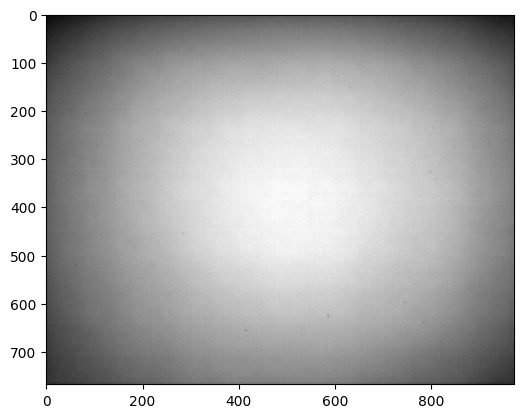

In [4]:
plt.imshow(flat, cmap="gray")

You can clearly see a strong vignette in the flat field image. This vignette is also visible in the transmission image:

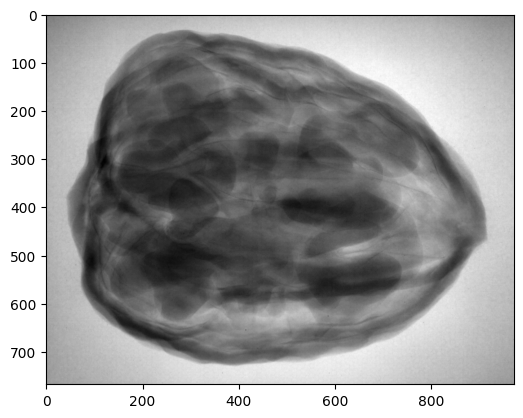

In [5]:
plt.imshow(img, cmap="gray")

This is most likely due to the X-ray beam and detector setup not being perfect in many senses. Of course, for this dataset you have a flat field image, so you can easily clean that up. That is not the question of the exercise.

When you have a flat field image, `I0` can be estimated easily as the mean of that (which is also only an approximation). However, what do you do, when you do not even have the flat field image?

First, let us look at how the image looks as absoprtion image, with `I0` approximated using the flat field image.

In [6]:
def proprocess(img, I0):
    proj = np.copy(img)
    proj[proj > I0] = I0
    proj = -np.log(proj / I0)
    return proj

I0 = 11873.026002818502


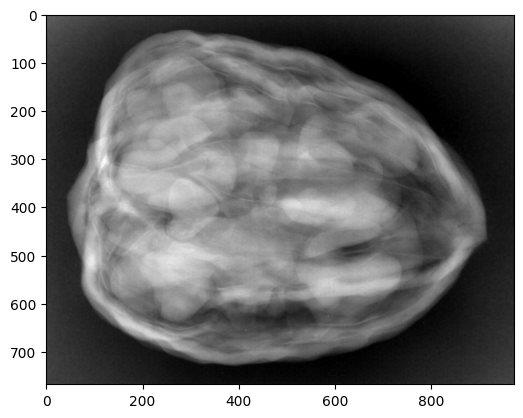

In [7]:
I0 = np.mean(flat)
print(f"{I0 = }")
plt.imshow(proprocess(img, I0), cmap="gray")

However, just a quick step back. Is taking the average of the complete flat field image actually what we want?
As we can clearly see, there is strong vignetting, so what about only averaging the center to get a good estimate
of the inital intensity?

I0 = 13646.036575


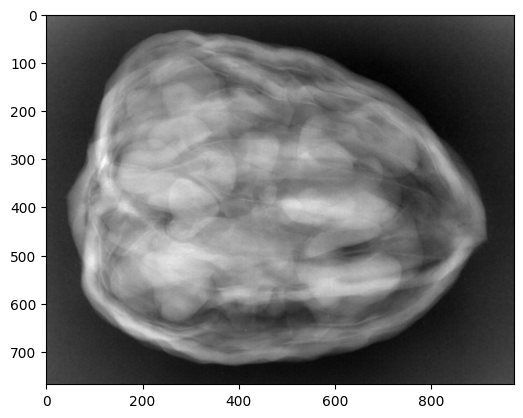

In [8]:
I0 = np.mean(flat[300:500, 400:600])
print(f"{I0 = }")
plt.imshow(proprocess(img, I0), cmap="gray")

From here, we can already clearly see that the estimates differ quite drastically. Which do you think is better?

## Approach 1: Take the brightest pixel

TODO: Compute `I0` as the maximum of the projection image. And look at the image.

In [ ]:
I0 = 10000
print(f"{I0 = }")
plt.imshow(proprocess(img, I0), cmap="gray")

## Approach 2: Mean of maxium of each row/column

TODO: Compute `I0` as the mean of the maximum of the rows/columns of the projection image. Preprocess the image and have a look

In [ ]:
I0 = 10000
print(f"{I0 = }")
plt.imshow(proprocess(img, I0), cmap="gray")

## Approach 3: Mean of the transmission image

TODO: Compute `I0` as the mean of the complete transmission image. Preprocess the image and have a look

In [ ]:
I0 = 10000
print(f"{I0 = }")
plt.imshow(proprocess(img, I0), cmap="gray")

## Approach 4: Mean of rectengular region

TODO: Compute `I0` as the mean of a small recentuglar region of the tranmission image. Preprocess the image and have a look. How does the size and position of the rectangle affect the image quality? What is a good position in your opinion?

In [ ]:
I0 = 10000
print(f"{I0 = }")
plt.imshow(proprocess(img, I0), cmap="gray")

## Discuss:

Which option of these produce satifactory images? Under what conditions do certain choices work well and which do not work well?